# 0.0 Imports

In [48]:
import pandas   as pd
import numpy    as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
df_train_all    =   pd.read_csv('./datasets/train.csv')
df_test     =   pd.read_csv('./datasets/test.csv')

In [50]:
df_train_y = df_train_all['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df_train = df_train_all.drop(columns=['Satisfaction'])

# 1.0 Data Description

In [51]:
df1 = df_train_all.copy()

## 1.1 Data Dimension

In [52]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 103904
Number of columns: 24


## 1.2 Analyze data

In [53]:
df1_original = df1.copy()  # Cria uma cópia do DataFrame original

# Realiza as operações de limpeza nos nomes das colunas
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.strip()
df1.columns = df1.columns.str.replace(' ', '_')

In [54]:
df1.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom,self-store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


In [55]:
df1.dtypes

id                              int64
gender                         object
customer_type                  object
age                             int64
type_of_purchase               object
store_size                     object
store_distance                  int64
instore_wifi                    int64
open/close_time_convenient      int64
easy_of_online_shopping         int64
store_location                  int64
toilet_cleaning                 int64
dressing_room                   int64
waiting_room                    int64
kids_entertainment              int64
seller_service                  int64
showroom                        int64
self-store                      int64
purchase_service                int64
store_service                   int64
cleanliness                     int64
carrier_delay_in_minutes        int64
delivery_delay_in_minutes     float64
satisfaction                   object
dtype: object

### 1.2.1 Changing values in string columns to integer numbers

In [56]:
# divides the dataframe into integer and string values.
df1_int     =   df1.select_dtypes(include=['int64', 'float64'])
df1_string  =   df1.select_dtypes(exclude=['int64', 'float64'])

In [57]:
# # change colum gender to integer value
# df1['gender'].value_counts()
df1['gender'] = df1['gender'].apply(lambda x: 0 if x == 'Female' else 1)

# # change colum "customer_type" to integer value
# df1['customer_type'].value_counts()
df1['customer_type'] = df1['customer_type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)

# # change colum "type_of_purchase" to integer value
# df1['type_of_purchase'].value_counts()
df1['type_of_purchase'] = df1['type_of_purchase'].apply(lambda x: 0 if x == 'Gift' else 1)

# # change colum "store_size" to integer value
# df1['store_size'].value_counts()
df1['store_size'] = df1['store_size'].apply(lambda x: 0 if x == 'Large' else ( 1 if x == 'Medium' else 2 ))

# # change colum "satisfaction" to integer value
# df1['satisfaction'].value_counts()
df1['satisfaction'] = df1['satisfaction'].apply(lambda x: 0 if x == 'Neutral or Dissatisfaction' else 1)


## 1.3 Check NAs

In [58]:
df1.isna().sum()

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
instore_wifi                    0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self-store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

## 1.4 Check NAs
**Notice:** We detected that the column `delivery_delay_in_minutes` has null values.

In [59]:
df_delivery_delay_in_minutes = df1[df1['delivery_delay_in_minutes'].isnull()]

In [60]:
df1['delivery_delay_in_minutes'].value_counts()

delivery_delay_in_minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

## 1.5 Correlated Columns

### 1.5.1 Correlated colum ``satisfaction``

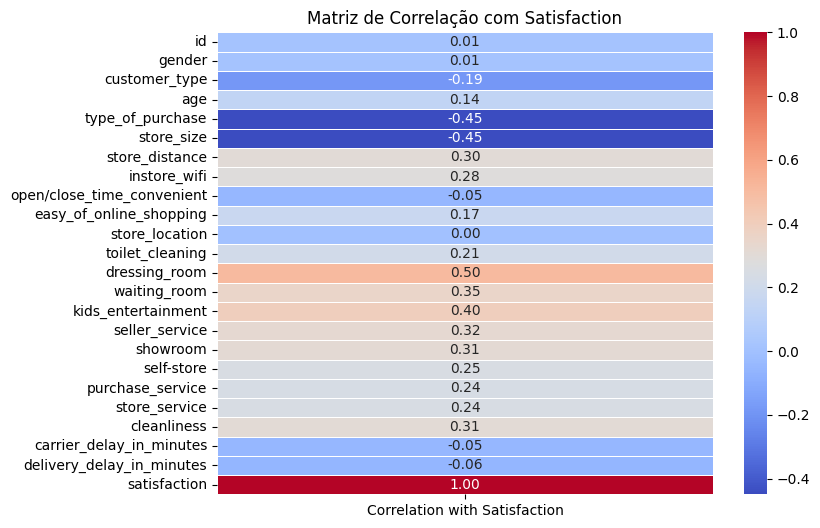

In [77]:
# Assuming that 'satisfaction' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['satisfaction'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with Satisfaction']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com Satisfaction')
plt.show()

### 1.5.1 Correlated colum ``store_location``

**Notice:** We identified that 'instore_wifi', 'open/close_time_convenient' and 'easy_of_online_shopping' are more related to store_location

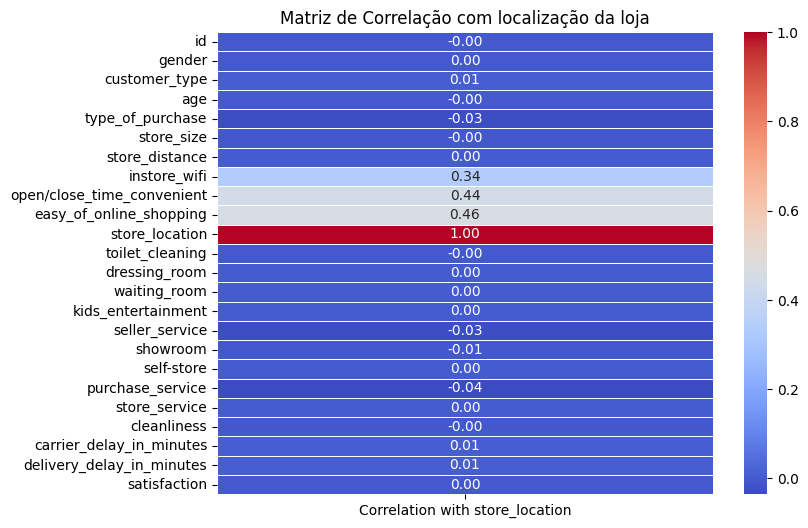

In [ ]:
# Assuming that 'store_location' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['store_location'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with store_location']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com localização da loja')
plt.show()

### 1.5.2 Correlated colum ``customer_type``

**Notice:** We identified that 'age' and 'type_of_purchase' are more related to 'customer_type'

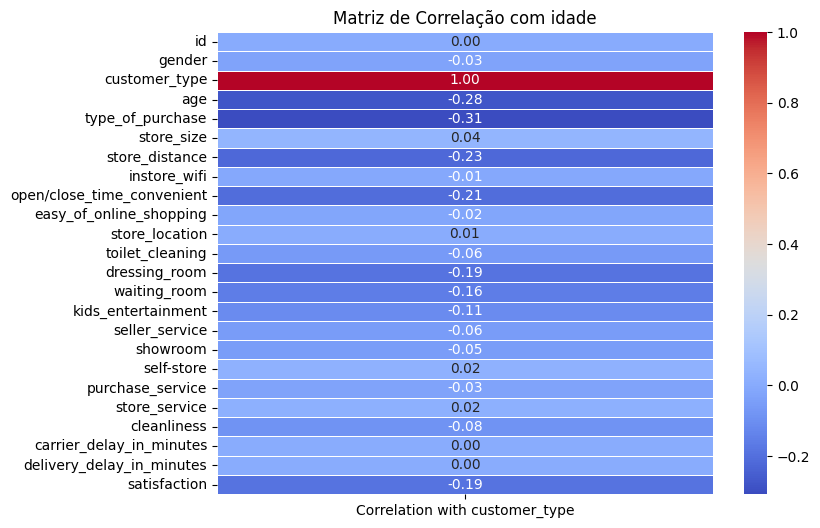

In [74]:
# Assuming that 'customer_type' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['customer_type'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with customer_type']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.3 Correlated colum ``carrier_delay_in_minutes``

**Notice:** We identified that 'delivery_delay_in_minutes' are more related to 'carrier_delay_in_minutes'

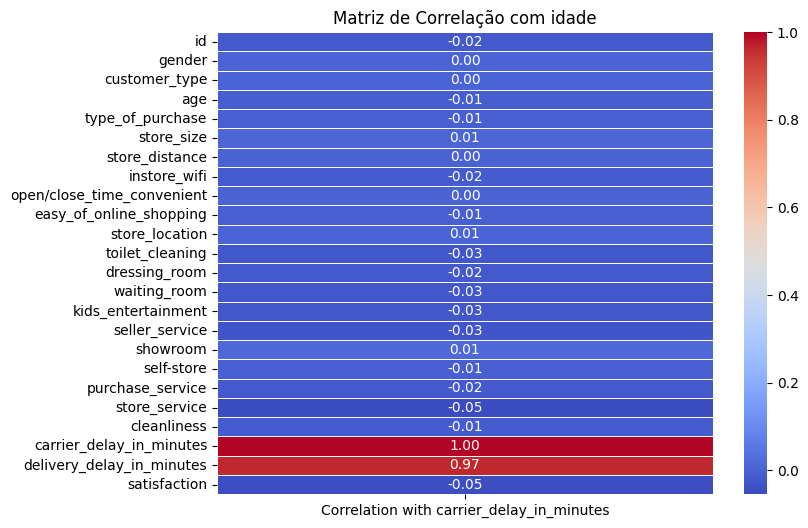

In [ ]:
# Assuming that 'carrier_delay_in_minutes' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['carrier_delay_in_minutes'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with carrier_delay_in_minutes']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.4 Correlated colum ``delivery_delay_in_minutes``

**Notice:** We identified that 'carrier_delay_in_minutes' are more related to 'delivery_delay_in_minutes'

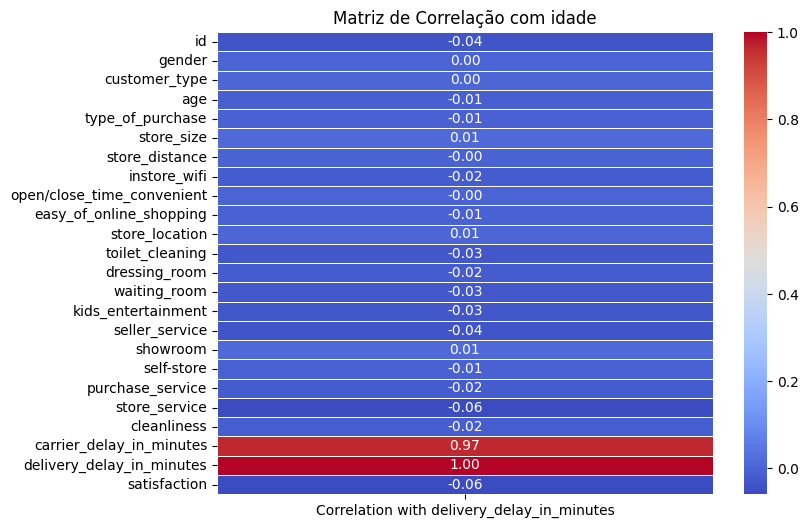

In [ ]:
# Assuming that 'delivery_delay_in_minutes' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['delivery_delay_in_minutes'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with delivery_delay_in_minutes']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.5 Correlated colum ``type_of_purchase``

**Notice:** We identified that 'store_size', 'customer_type' and 'store_distance' are more related to 'type_of_purchase'

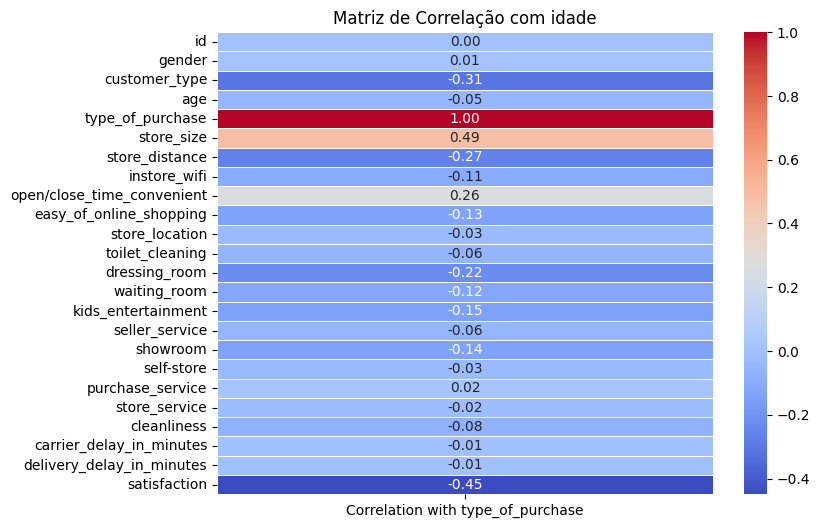

In [80]:
# Assuming that 'type_of_purchase' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['type_of_purchase'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with type_of_purchase']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.6 Correlated colum ``store_size``

**Notice:** We identified that 'store_distance', 'type_of_purchase' and 'dressing_room' are more related to 'store_size'

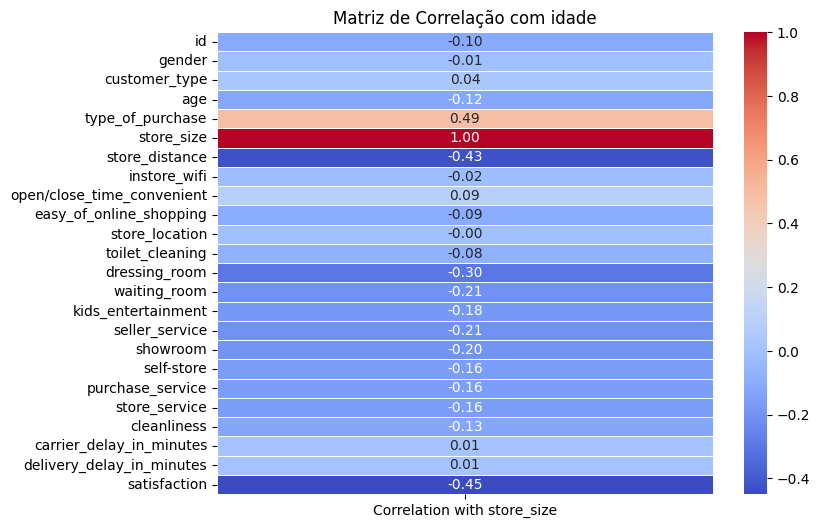

In [81]:
# Assuming that 'store_size' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['store_size'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with store_size']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.7 Correlated colum ``dressing_room``

**Notice:** We identified that 'waiting_room', 'easy_of_online_shopping', 'instore_wifi', 'cleanliness', 'kids_entertainment' and 'store_size' are more related to 'dressing_room'

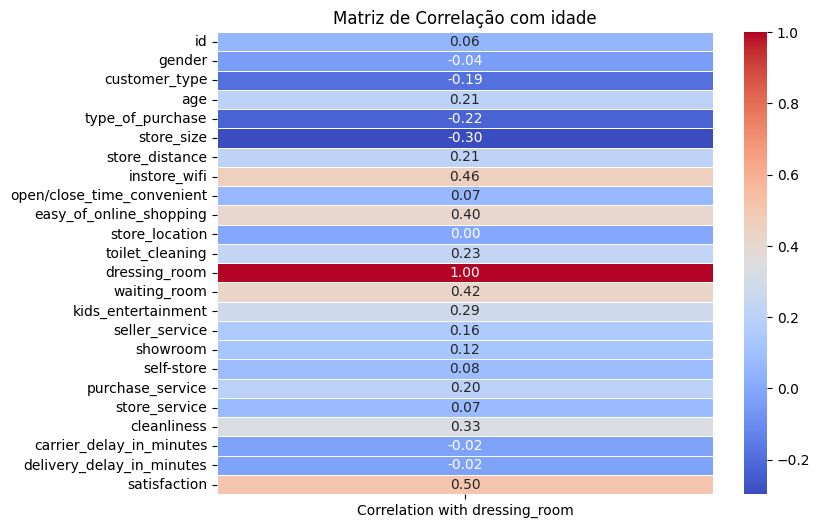

In [82]:
# Assuming that 'dressing_room' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['dressing_room'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with dressing_room']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

# 2.0 Feature Engineering

# 3.0 Data Filtering

# 4.0 EDA

# 5.0 Data preparation

# 6.0. Feature Selection

# 7.0 Machine Learning